**作业题：**
1.	计算2017年4月每日的销售额、客流量、客单价，并用图表形式展现
2.	计算2017年4月中周一至周日的销售额、客流量、客单价，并用图表形式展现
3.	随机选取2017年4月中的一天，计算一天中不同小时的销售额、客流量、客单价，并用图表形式展现

**题目说明：**
- 销售额 = 售价 乘 销量 = ["Price"] 乘 ["Qty"]
- 客流量 = 订单量（客流量用订单量代替）
- 客单价 = 销售额/客流量

**业务背景：**
- 通过第一节我们已经判断出了17年4月各指标发展情况的好坏，作为数据分析师，不管业务出现好或者坏，都要去追寻为什么？在追寻为什么的时候，就可以结合业务具体去看是因为哪方面的变化，引起了某一段时间内整体指标的变化。

- 这一节选择时间维度去看一下17年4月不同时间维度各指标的变化情况。


**计算逻辑说明：**
1.	分日的各指标计算类似于分月的各指标计算，只不过这里需要将时间转化为日维度的数据，然后用日期去做透视表就可以算出每一天的各指标情况。
2.	分周、分小时与分日的计算逻辑一致，需要分别把时间转化为周维度、以及小时维度。

# 导入相关库

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dateutil.parser import parse
import cufflinks
import plotly.offline as py_offline
import cufflinks as cf
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.graph_objs as go
plt.rcParams["font.sans-serif"]='SimHei'#解决中文乱码
plt.rcParams['axes.unicode_minus'] = False#解决负号无法正常显示的问题

# 导入数据 

In [2]:
data_2017 = pd.read_csv(r"2017年1月&2017年4月数据.csv",parse_dates = ["STime"])
data_2017.head()

,GoodsID,CateID,Cost,Price,Qty,shopID,SDate,STime,SheetID,CashValue
0,30006206,915000003,20.673643,25.23,0.328,CDLG,20170103,2017-01-03 09:56:55,20170103CDLG000210052759,56.453
1,30163281,914010000,1.724210,2.00,2.000,CDLG,20170103,2017-01-03 09:56:55,20170103CDLG000210052759,56.453
2,30200518,922000000,16.344857,19.62,0.230,CDLG,20170103,2017-01-03 09:56:55,20170103CDLG000210052759,56.453
3,29989105,922000000,1.971475,2.80,2.044,CDLG,20170103,2017-01-03 09:56:55,20170103CDLG000210052759,56.453
4,30179558,915000100,34.219740,47.41,0.226,CDLG,20170103,2017-01-03 09:56:55,20170103CDLG000210052759,56.453


In [3]:
data_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 897232 entries, 0 to 897231
Data columns (total 10 columns):
GoodsID      897232 non-null int64
CateID       897232 non-null int64
Cost         896550 non-null float64
Price        897232 non-null float64
Qty          897232 non-null float64
shopID       897232 non-null object
SDate        897232 non-null int64
STime        897232 non-null datetime64[ns]
SheetID      897232 non-null object
CashValue    897232 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(2)
memory usage: 68.5+ MB


In [4]:
data_2016 = pd.read_csv(r"2016年1月&20164月数据.csv",parse_dates = ["STime"])
data_2016.head()

,GoodsID,CateID,Cost,Price,Qty,shopID,SDate,STime,SheetID,CashValue
0,29989301,925090000,17.048322,17.59,0.522,CDLG,20160101,2016-01-01 07:02:01,20160101CDLGP00110000001,44.321
1,29989287,925090000,0.000000,28.02,0.809,CDLG,20160101,2016-01-01 07:02:01,20160101CDLGP00110000001,44.321
2,29989302,925090000,26.800070,27.65,0.451,CDLG,20160101,2016-01-01 07:02:01,20160101CDLGP00110000001,44.321
3,30144186,912060303,49.620000,49.62,0.318,CDLG,20160101,2016-01-01 07:03:14,20160101CDLGP00110000002,15.779
4,29989073,922000201,2.314974,3.61,0.326,CDLG,20160101,2016-01-01 07:04:05,20160101CDLGP00110000003,4.715


In [5]:
data_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1116447 entries, 0 to 1116446
Data columns (total 10 columns):
GoodsID      1116447 non-null int64
CateID       1116447 non-null int64
Cost         1114288 non-null float64
Price        1116447 non-null float64
Qty          1116447 non-null float64
shopID       1116447 non-null object
SDate        1116447 non-null int64
STime        1116447 non-null datetime64[ns]
SheetID      1116447 non-null object
CashValue    1116447 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(2)
memory usage: 85.2+ MB


In [6]:
data_2016.drop_duplicates().shape

(1067302, 10)

In [7]:
data_2017.drop_duplicates().shape

(855620, 10)

In [8]:
data_2016 = data_2016.drop_duplicates()
data_2017 = data_2017.drop_duplicates()

In [9]:
data_2016.shape

(1067302, 10)

In [10]:
data_2017.shape

(855620, 10)

# 数据预处理

In [11]:
data_2016["date"] = [parse(str(time)) for time in data_2016["SDate"]]
data_2017["date"] = [parse(str(time)) for time in data_2017["SDate"]]

In [12]:
data_2016["月份"] = [time.month for time in data_2016["date"]]
data_2017["月份"] = [time.month for time in data_2017["date"]]

In [13]:
data_2017["月份"].unique()

array([1, 4], dtype=int64)

In [14]:
data_2016["月份"].unique()

array([1, 4], dtype=int64)

# 分日趋势图

In [15]:
April_data = data_2017[data_2017["月份"] == 4]
April_data.head()

,GoodsID,CateID,Cost,Price,Qty,shopID,SDate,STime,SheetID,CashValue,date,月份
493644,30089347,910030000,2.370000,2.62,7.000,CDLG,20170405,2017-04-05 18:20:35,20170405CDLG000310112461,18.340,2017-04-05,4
493645,30020269,923000101,7.636254,10.80,1.064,CDLG,20170405,2017-04-05 18:20:57,20170405CDLG000310112462,11.496,2017-04-05,4
493646,30006266,914100000,9.020000,9.12,1.000,CDLG,20170405,2017-04-05 18:21:43,20170405CDLG000310112463,35.200,2017-04-05,4
493647,30166320,936010000,5.208750,6.52,1.000,CDLG,20170405,2017-04-05 18:21:43,20170405CDLG000310112463,35.200,2017-04-05,4
493651,29989058,922000001,0.525031,0.58,2.414,CDLG,20170405,2017-04-05 18:22:22,20170405CDLG000310112464,47.322,2017-04-05,4


In [16]:
April_data["sale_sum"] = (April_data["Price"]*April_data["Qty"])

In [17]:
April_data.head()

,GoodsID,CateID,Cost,Price,Qty,shopID,SDate,STime,SheetID,CashValue,date,月份,sale_sum
493644,30089347,910030000,2.370000,2.62,7.000,CDLG,20170405,2017-04-05 18:20:35,20170405CDLG000310112461,18.340,2017-04-05,4,18.34000
493645,30020269,923000101,7.636254,10.80,1.064,CDLG,20170405,2017-04-05 18:20:57,20170405CDLG000310112462,11.496,2017-04-05,4,11.49120
493646,30006266,914100000,9.020000,9.12,1.000,CDLG,20170405,2017-04-05 18:21:43,20170405CDLG000310112463,35.200,2017-04-05,4,9.12000
493647,30166320,936010000,5.208750,6.52,1.000,CDLG,20170405,2017-04-05 18:21:43,20170405CDLG000310112463,35.200,2017-04-05,4,6.52000
493651,29989058,922000001,0.525031,0.58,2.414,CDLG,20170405,2017-04-05 18:22:22,20170405CDLG000310112464,47.322,2017-04-05,4,1.40012


In [18]:
April_data.groupby("SDate")["sale_sum"].sum()

SDate
20170401    111186.69693
20170402    114319.63170
20170403    115252.22685
20170404    106454.93157
20170405     83312.88254
20170406     88225.14987
20170407     76980.41585
20170408    105624.61177
20170409    127797.29675
20170410    124677.88441
20170411     85856.45188
20170412     85086.95909
20170413     87074.74940
20170414     93280.58419
20170415    107475.81662
20170416    120999.10343
20170417     79201.68166
20170418     98905.82294
20170419     63741.90135
20170420    102592.43128
20170421     78569.74341
20170422    128930.39142
20170423    126883.93038
20170424     91634.51527
20170425    127137.58165
20170426     89379.87373
20170427     83603.32458
20170428     97561.90740
20170429    116873.16467
20170430    122573.60531
Name: sale_sum, dtype: float64

In [19]:
grouped_sale_sum = April_data.copy().groupby("SDate")["sale_sum"].sum()
#grouped_sale_sum.plot(title = "四月销售额分日趋势图")

%matplotlib inline
# set figure size
mpl.rcParams['figure.figsize']=[15,12]
# set figure style
plt.style.use('ggplot')
# plotly layout
layout=go.Layout(
    autosize=True,
    margin=go.layout.Margin(
        l=20,
        r=20,
        t=40,
        b=20,
        pad=10),
    template='ggplot2'
)
py_offline.init_notebook_mode(connected=True)

In [20]:
grouped_sale_sum.shape
grouped_sale_sum.head(3)


SDate
20170401    111186.69693
20170402    114319.63170
20170403    115252.22685
Name: sale_sum, dtype: float64

In [21]:
import arrow
time_day= []
for each_day in list(grouped_sale_sum.index.values):
    time_day.append(arrow.get(str(each_day),'YYYYMMDD').format('YYYY-MM-DD '))
#time_day
grouped_sale_sum.index = pd.DatetimeIndex(time_day)

In [22]:
#grouped_sale_sum

In [23]:
py_offline.iplot(grouped_sale_sum.iplot(asFigure=True,
                          title='四月销售额分日趋势图',
                          xTitle='Sdate',
                          yTitle='sale_sum Value',
                          theme='ggplot'))

In [24]:
grouped_traffic = April_data[["SDate","SheetID"]].drop_duplicates().groupby("SDate")["SheetID"].count()
#grouped_traffic.plot(title = "四月客流量分日趋势图")
time_day= []
for each_day in list(grouped_traffic.index.values):
    time_day.append(arrow.get(str(each_day),'YYYYMMDD').format('YYYY-MM-DD '))
#time_day
grouped_traffic.index = pd.DatetimeIndex(time_day)
py_offline.iplot(grouped_traffic .iplot(asFigure=True,
                          title='四月客流分日趋势图',
                          xTitle='Sdate',
                          yTitle=' Value',
                          theme='ggplot'))
#grouped_traffic.plot(title = "四月客流量分日趋势图")

In [25]:
grouped_price = (grouped_sale_sum/grouped_traffic)
#grouped_price.plot(title = "四月客单价分日趋势图")
#time_day
py_offline.iplot(grouped_price.iplot(asFigure=True,
                          title='四月客单价日趋势图',
                          xTitle='Sdate',
                          yTitle=' Value',
                          theme='ggplot'))

# 分周数据

In [26]:
April_data["weeknum"] = [time.weekday()+1 for time in April_data["STime"]]

In [27]:
April_data.head()

,GoodsID,CateID,Cost,Price,Qty,shopID,SDate,STime,SheetID,CashValue,date,月份,sale_sum,weeknum
493644,30089347,910030000,2.370000,2.62,7.000,CDLG,20170405,2017-04-05 18:20:35,20170405CDLG000310112461,18.340,2017-04-05,4,18.34000,3
493645,30020269,923000101,7.636254,10.80,1.064,CDLG,20170405,2017-04-05 18:20:57,20170405CDLG000310112462,11.496,2017-04-05,4,11.49120,3
493646,30006266,914100000,9.020000,9.12,1.000,CDLG,20170405,2017-04-05 18:21:43,20170405CDLG000310112463,35.200,2017-04-05,4,9.12000,3
493647,30166320,936010000,5.208750,6.52,1.000,CDLG,20170405,2017-04-05 18:21:43,20170405CDLG000310112463,35.200,2017-04-05,4,6.52000,3
493651,29989058,922000001,0.525031,0.58,2.414,CDLG,20170405,2017-04-05 18:22:22,20170405CDLG000310112464,47.322,2017-04-05,4,1.40012,3


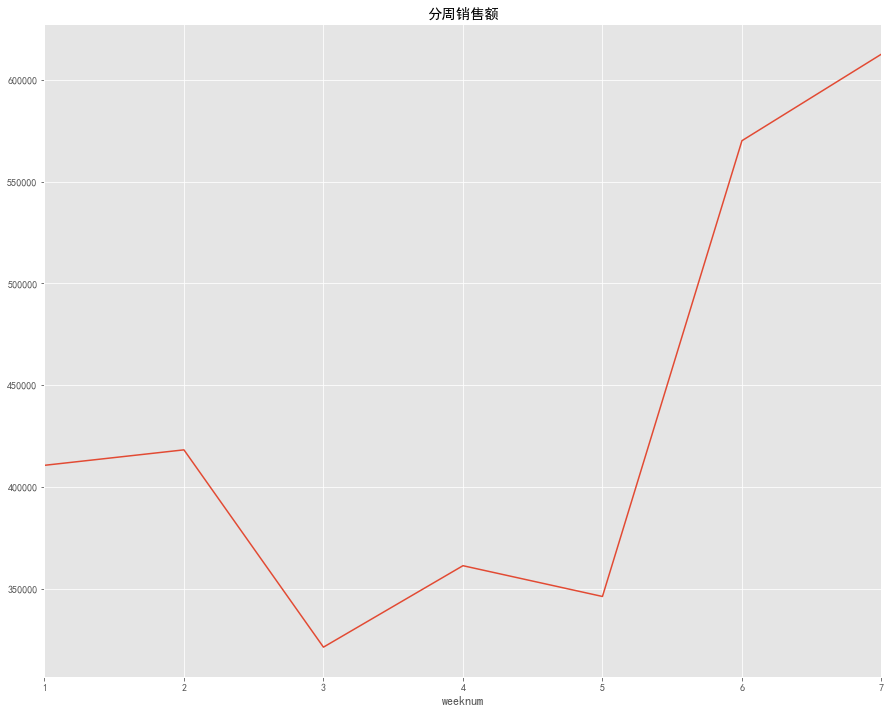

In [28]:
week_sale = April_data.copy().groupby("weeknum")["sale_sum"].sum()
week_sale.plot(title = "分周销售额")

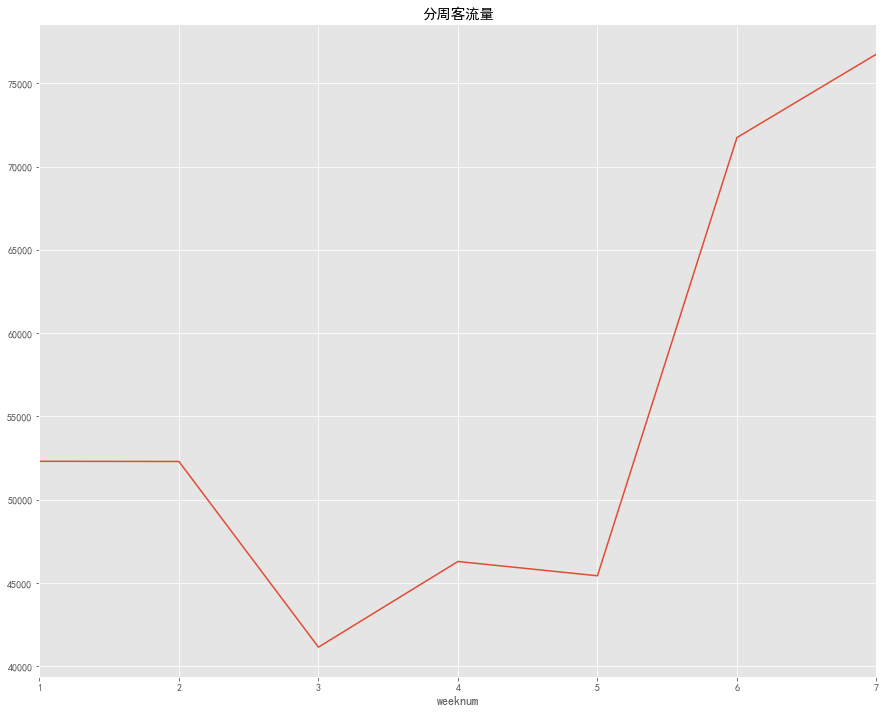

In [29]:
week_traffic = April_data.copy()[["SheetID","weeknum"]].groupby("weeknum")["SheetID"].count()
week_traffic.plot(title = "分周客流量")

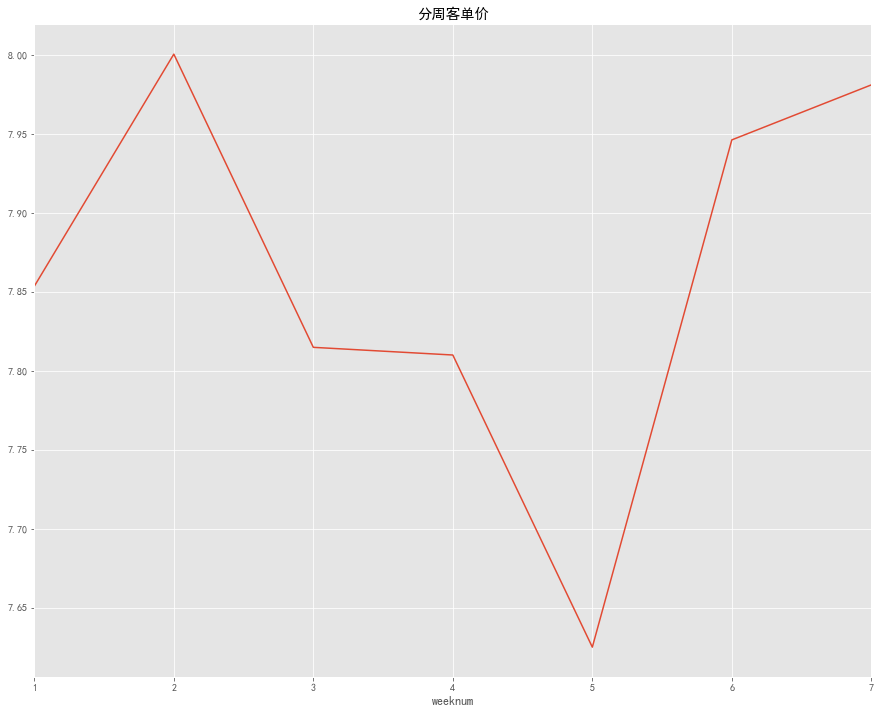

In [30]:
week_price = week_sale/week_traffic
week_price.plot(title = "分周客单价")

# 分小时数据

In [31]:
April_day = April_data[April_data["SDate"] == 20170430]

In [32]:
April_day["hour"] = [int(str(time)[11:13]) for time in April_day["STime"]]

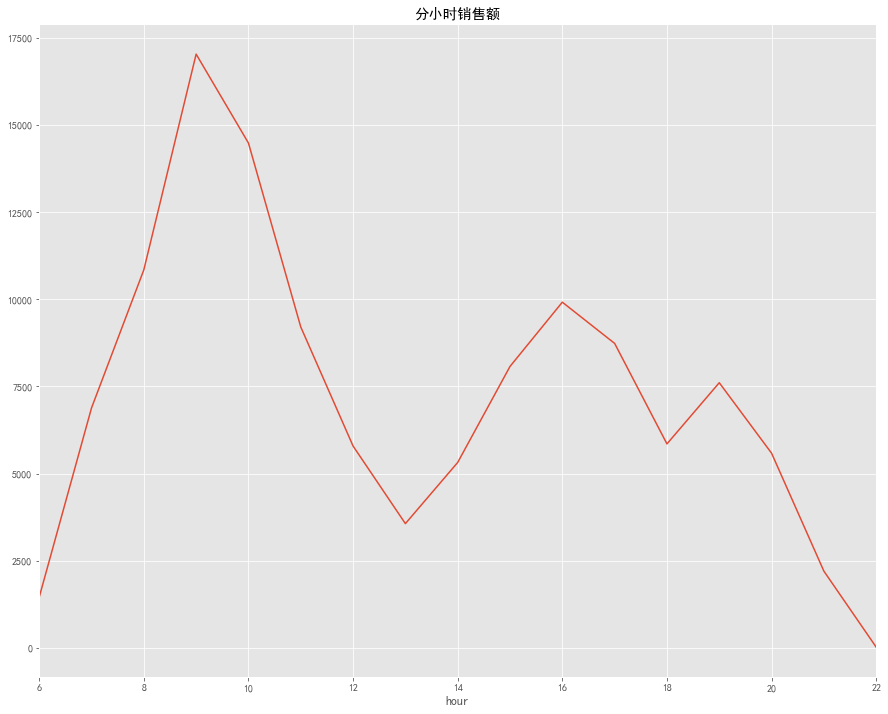

In [33]:
day_sale = April_day.groupby("hour")["sale_sum"].sum()
day_sale.plot(title = "分小时销售额")

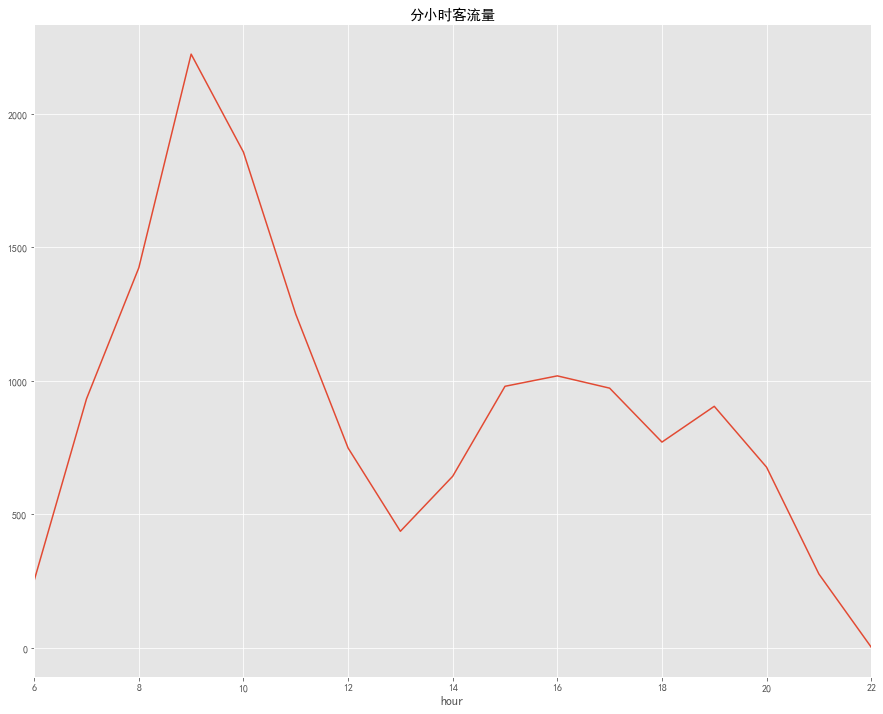

In [34]:
day_traffic = April_day[["SheetID","hour"]].groupby("hour")["SheetID"].count()
day_traffic.plot(title = "分小时客流量")

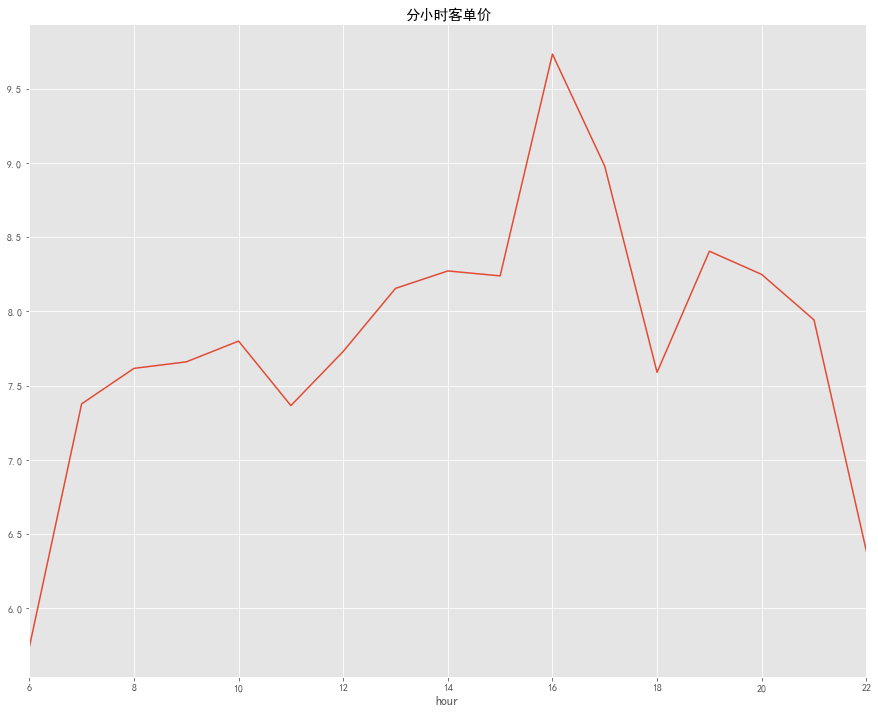

In [35]:
day_price = day_sale/day_traffic
day_price.plot(title = "分小时客单价")